In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as sc

In [3]:
confidence_level = 0.95

In [5]:
hist_pr = xr.open_dataset('../hist_pr_ds.nc').sel(time=slice('1980-01-01','2014-12-31'))
amip_pr = xr.open_dataset('../amip_pr_ds.nc').sel(time=slice('1980-01-01','2014-12-31'))
cesm_pr = xr.open_dataset('../cesm2_lens2_pr.nc').sel(time=slice('1980-01-01','2014-12-31'))

hist_aht = xr.open_dataset('../hist_aht.nc').sel(time=slice('1980-01-01','2014-12-31'))
amip_aht = xr.open_dataset('../amip_aht.nc').sel(time=slice('1980-01-01','2014-12-31'))
cesm_aht = xr.open_dataset('../CESM2_LENS2_aht_ds_1850_2014.nc').sel(time=slice('1980-01-01','2014-12-31'))

hist_pr = hist_pr.sel(model=hist_aht.model)
amip_pr = amip_pr.sel(model=amip_aht.model)

hist_aht_trend = hist_aht.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)
amip_aht_trend = amip_aht.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)
cesm_aht_trend = cesm_aht.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)


hist_pr_trend = hist_pr.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)
amip_pr_trend = amip_pr.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)
cesm_pr_trend = cesm_pr.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)

In [6]:
reanalysis_pr = xr.open_dataset('../reanalysis_precip.nc')
reanalysis_aht = xr.open_dataset('../reanalysis_aht.nc')

reanalysis_aht = reanalysis_aht.sel(model=reanalysis_pr.model)

reanalysis_pr_trend = reanalysis_pr.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)
reanalysis_aht_trend = reanalysis_aht.groupby('time.year').mean('time').polyfit(deg=1, dim='year').sel(degree=1)



In [8]:
amip_std_error = xr.open_dataset('../amip_ds_trend_std_error.nc')
hist_std_error = xr.open_dataset('../hist_ds_trend_std_error.nc')
reanalysis_std_error = xr.open_dataset('../reanalysis_ds_trend_std_error.nc')
cesm_std_error = xr.open_dataset('../cesm2_le_ds_trend_std_error.nc')

In [9]:
amip_Neff = xr.open_dataset('../amip_ds_trend_Neff.nc')
hist_Neff = xr.open_dataset('../hist_ds_trend_Neff.nc')
reanalysis_Neff = xr.open_dataset('../reanalysis_ds_trend_Neff.nc')
cesm_Neff = xr.open_dataset('../cesm2_le_ds_trend_Neff.nc')

In [11]:
amip_pr_std_error = xr.open_dataset('../amip_pr_trend_std_error.nc')
amip_pr_Neff = xr.open_dataset('../amip_pr_trend_Neff.nc')

hist_pr_std_error = xr.open_dataset('../hist_pr_trend_std_error.nc')
hist_pr_Neff = xr.open_dataset('../hist_pr_trend_Neff.nc')

reanalysis_pr_std_error = xr.open_dataset('../reanalysis_pr_trend_std_error.nc')
reanalysis_pr_Neff = xr.open_dataset('../reanalysis_pr_trend_Neff.nc')

cesm_pr_std_error = xr.open_dataset('../cesm_pr_trend_std_error.nc')
cesm_pr_Neff = xr.open_dataset('../cesm_pr_trend_Neff.nc')

In [12]:
hist_pr_std_error = hist_pr_std_error.sel(model=hist_aht.model)
hist_pr_Neff = hist_pr_Neff.sel(model=hist_aht.model)
amip_pr_std_error = amip_pr_std_error.sel(model=amip_aht.model)
amip_pr_Neff = amip_pr_Neff.sel(model=amip_aht.model)

In [14]:
gpcp_precip = xr.open_dataset('../gpcp_precip.nc').precip.sel(time=slice('1980-01-01','2014-12-31')).mean(['lon'])
gpcp_precip_trend = gpcp_precip.groupby('time.year').mean('time').polyfit(dim='year', deg=1)


In [15]:
cesm_pr_trend

<xarray.Dataset>
Dimensions:                     (model: 100, lat: 192)
Coordinates:
    degree                      int64 1
  * model                       (model) object '001_1001_cmip6' ... '020_1301...
  * lat                         (lat) float64 -90.0 -89.06 -88.12 ... 89.06 90.0
Data variables:
    PRECT_polyfit_coefficients  (model, lat) float64 6.691e-12 ... 1.321e-11

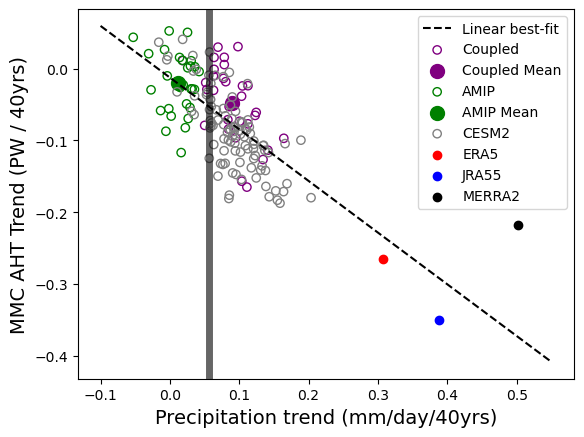

In [16]:
pr_slice = slice(-10, 25)
aht_slice = slice(-16, -14)

pr_slice_reanalysis = slice(25, -10)

model_adjust = 86400
cesm_adjust = 86400 * 1000
aht_adjust = 40 / 1e15
pr_adjust = 40


prs_data = []

prs_data.append((pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust).values)
prs_data.append((pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust).values)
prs_data.append((pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude')).values)
prs_data.append((pr_adjust * cesm_adjust * cesm_pr_trend.PRECT_polyfit_coefficients.sel(lat=pr_slice).mean('lat')).values)

prs_data = np.hstack(prs_data)

aht_data = []

aht_data.append((aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * cesm_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)

aht_data = np.hstack(aht_data)

linregress_pr_aht = linregress(prs_data, aht_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.1, 0.55, 50), int_val + np.linspace(-0.1, 0.55, 50) * slope, '--', color='k',
        label='Linear best-fit')

plt.scatter(pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust,
          aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           facecolors='none', edgecolor='purple', label='Coupled')

plt.scatter(pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean(['lat', 'model']) * model_adjust,
          aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean(['latitude', 'model']), 
           color='purple', label='Coupled Mean', s=100)

plt.scatter(pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust,
          aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           facecolors='none', edgecolor='g', label='AMIP')

plt.scatter(pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean(['lat', 'model']) * model_adjust,
          aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean(['latitude', 'model']), 
           color='g', label='AMIP Mean', s=100)

plt.scatter(pr_adjust * cesm_pr_trend.PRECT_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * cesm_adjust,
          aht_adjust * cesm_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           facecolors='none', edgecolor='grey', label='CESM2')

plt.scatter(pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude').sel(model='ERA5'),
           aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude').sel(model='ERA5'),
           color='r', label='ERA5')

plt.scatter(pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude').sel(model='JRA'),
           aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude').sel(model='JRA'),
           color='b', label='JRA55')

plt.scatter(pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude').sel(model='MERRA'),
           aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude').sel(model='MERRA'),
           color='k', label='MERRA2')

plt.axvline(pr_adjust * gpcp_precip_trend.polyfit_coefficients.sel(degree=1).sel(lat=pr_slice).mean('lat'),
           color='k', lw=5, alpha=0.6)

plt.legend(loc=0)

plt.xlabel('Precipitation trend (mm/day/40yrs)', fontsize=14)
plt.ylabel('MMC AHT Trend (PW / 40yrs)', fontsize=14)

#plt.savefig('figures/precip_mmc_aht_scatter')
plt.show()

<ipython-input-33-0c0bad8b459d>:55: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(hist_pr_val.where(~both_sig_hist), hist_aht_val.where(~both_sig_hist), edgecolor='purple', facecolor='', label='Coupled')
<ipython-input-33-0c0bad8b459d>:76: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(amip_pr_val.where(~both_sig_amip), amip_aht_val.where(~both_sig_amip), edgecolor='g', facecolor='', label='AMIP')
<ipython-input-33-0c0bad8b459d>:97: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(cesm_pr_val.where(~both_sig_cesm), ces

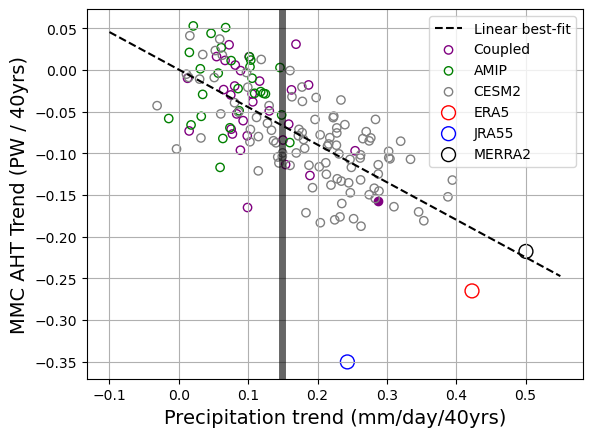

In [33]:
pr_slice = slice(0, 25)
aht_slice = slice(-16, -14)

pr_slice_reanalysis = slice(25, 0)

model_adjust = 86400
cesm_adjust = 86400 * 1000
aht_adjust = 40 / 1e15
pr_adjust = 40


prs_data = []

prs_data.append((pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust).values)
prs_data.append((pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust).values)
prs_data.append((pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude')).values)
prs_data.append((pr_adjust * cesm_adjust * cesm_pr_trend.PRECT_polyfit_coefficients.sel(lat=pr_slice).mean('lat')).values)

prs_data = np.hstack(prs_data)

aht_data = []

aht_data.append((aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)
aht_data.append((aht_adjust * cesm_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')).values)

aht_data = np.hstack(aht_data)

linregress_pr_aht = linregress(prs_data, aht_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.1, 0.55, 50), int_val + np.linspace(-0.1, 0.55, 50) * slope, '--', color='k',
        label='Linear best-fit')

hist_pr_val = pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust
hist_aht_val = aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')

hist_Neff_val1 = hist_pr_Neff.pr.sel(latitude=pr_slice).mean('latitude')
hist_Neff_val2 = hist_Neff.mmc_aht.sel(latitude=aht_slice).mean('latitude')
t_vals_hist1 = sc.t.ppf((1 + confidence_level)/2, hist_Neff_val1.values)
t_vals_hist2 = sc.t.ppf((1 + confidence_level)/2, hist_Neff_val2.values)
t_values1_hist = hist_pr_val / (pr_adjust * model_adjust * hist_pr_std_error.pr.sel(latitude=pr_slice).mean('latitude'))
t_values2_hist = hist_aht_val / (aht_adjust * hist_std_error.mmc_aht.sel(latitude=aht_slice).mean('latitude'))
val1_sig_hist = xr.where(abs(t_values1_hist) > t_vals_hist1, True, False)
val2_sig_hist = xr.where(abs(t_values2_hist) > t_vals_hist2, True, False)

both_sig_hist = np.logical_and(val1_sig_hist, val2_sig_hist)

plt.scatter(hist_pr_val.where(both_sig_hist), hist_aht_val.where(both_sig_hist), color='purple')
plt.scatter(hist_pr_val.where(~both_sig_hist), hist_aht_val.where(~both_sig_hist), edgecolor='purple', facecolor='', label='Coupled')

#plt.scatter(pr_adjust * hist_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust,
          #aht_adjust * hist_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           #facecolors='none', edgecolor='purple', label='Coupled')

amip_pr_val = pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust
amip_aht_val = aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')

amip_Neff_val1 = amip_pr_Neff.pr.sel(latitude=pr_slice).mean('latitude')
amip_Neff_val2 = amip_Neff.mmc_aht.sel(latitude=aht_slice).mean('latitude')
t_vals_amip1 = sc.t.ppf((1 + confidence_level)/2, amip_Neff_val1.values)
t_vals_amip2 = sc.t.ppf((1 + confidence_level)/2, amip_Neff_val2.values)
t_values1_amip = amip_pr_val / (pr_adjust * model_adjust * amip_pr_std_error.pr.sel(latitude=pr_slice).mean('latitude'))
t_values2_amip = amip_aht_val / (aht_adjust * amip_std_error.mmc_aht.sel(latitude=aht_slice).mean('latitude'))
val1_sig_amip = xr.where(abs(t_values1_amip) > t_vals_amip1, True, False)
val2_sig_amip = xr.where(abs(t_values2_amip) > t_vals_amip2, True, False)

both_sig_amip = np.logical_and(val1_sig_amip, val2_sig_amip)

plt.scatter(amip_pr_val.where(both_sig_amip), amip_aht_val.where(both_sig_amip), color='g')
plt.scatter(amip_pr_val.where(~both_sig_amip), amip_aht_val.where(~both_sig_amip), edgecolor='g', facecolor='', label='AMIP')

#plt.scatter(pr_adjust * amip_pr_trend.pr_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * model_adjust,
          #aht_adjust * amip_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           #facecolors='none', edgecolor='g', label='AMIP')

cesm_pr_val = pr_adjust * cesm_pr_trend.PRECT_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * cesm_adjust
cesm_aht_val = aht_adjust * cesm_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')

cesm_Neff_val1 = cesm_pr_Neff.PRECT.sel(latitude=pr_slice).mean('latitude')
cesm_Neff_val2 = cesm_Neff.mmc_aht.sel(latitude=aht_slice).mean('latitude')
t_vals_cesm1 = sc.t.ppf((1 + confidence_level)/2, cesm_Neff_val1.values)
t_vals_cesm2 = sc.t.ppf((1 + confidence_level)/2, cesm_Neff_val2.values)
t_values1_cesm = cesm_pr_val / (pr_adjust * cesm_adjust * cesm_pr_std_error.PRECT.sel(latitude=pr_slice).mean('latitude'))
t_values2_cesm = cesm_aht_val / (aht_adjust * cesm_std_error.mmc_aht.sel(latitude=aht_slice).mean('latitude'))
val1_sig_cesm = xr.where(abs(t_values1_cesm) > t_vals_cesm1, True, False)
val2_sig_cesm = xr.where(abs(t_values2_cesm) > t_vals_cesm2, True, False)

both_sig_cesm = np.logical_and(val1_sig_cesm, val2_sig_cesm)

plt.scatter(cesm_pr_val.where(both_sig_cesm), cesm_aht_val.where(both_sig_cesm), color='grey')
plt.scatter(cesm_pr_val.where(~both_sig_cesm), cesm_aht_val.where(~both_sig_cesm), edgecolor='grey', facecolor='', label='CESM2')

#plt.scatter(pr_adjust * cesm_pr_trend.PRECT_polyfit_coefficients.sel(lat=pr_slice).mean('lat') * cesm_adjust,
          #aht_adjust * cesm_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude'), 
           #facecolors='none', edgecolor='grey', label='CESM2')

reanalysis_pr_val = pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude')
reanalysis_aht_val = aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude')

reanalysis_Neff_val1 = reanalysis_pr_Neff.tp.sel(latitude=pr_slice_reanalysis).mean('latitude')
reanalysis_Neff_val2 = reanalysis_Neff.mmc_aht.sel(latitude=aht_slice).mean('latitude')
t_vals_reanalysis1 = sc.t.ppf((1 + confidence_level)/2, reanalysis_Neff_val1.values)
t_vals_reanalysis2 = sc.t.ppf((1 + confidence_level)/2, reanalysis_Neff_val2.values)
t_values1_reanalysis = reanalysis_pr_val / (pr_adjust * reanalysis_pr_std_error.tp.sel(latitude=pr_slice_reanalysis).mean('latitude'))
t_values2_reanalysis = reanalysis_aht_val / (aht_adjust * reanalysis_std_error.mmc_aht.sel(latitude=aht_slice).mean('latitude'))
val1_sig_reanalysis = xr.where(abs(t_values1_reanalysis) > t_vals_reanalysis1, True, False)
val2_sig_reanalysis = xr.where(abs(t_values2_reanalysis) > t_vals_reanalysis2, True, False)

both_sig_reanalysis = np.logical_and(val1_sig_reanalysis, val2_sig_reanalysis)

plt.scatter(reanalysis_pr_val.sel(model='ERA5'),
           reanalysis_aht_val.sel(model='ERA5'),
           edgecolor='r', facecolor='', s=100,  label='ERA5')

plt.scatter(reanalysis_pr_val.sel(model='JRA'),
           reanalysis_aht_val.sel(model='JRA'),
           edgecolor='b', facecolor='', s=100,  label='JRA55')

plt.scatter(reanalysis_pr_val.sel(model='MERRA'),
           reanalysis_aht_val.sel(model='MERRA'),
           edgecolor='k', facecolor='', s=100,  label='MERRA2')

#plt.scatter(pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude').sel(model='JRA'),
           #aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude').sel(model='JRA'),
           #color='b', label='JRA55')

#plt.scatter(pr_adjust * reanalysis_pr_trend.tp_polyfit_coefficients.sel(latitude=pr_slice_reanalysis).mean('latitude').sel(model='MERRA'),
           #aht_adjust * reanalysis_aht_trend.mmc_aht_polyfit_coefficients.sel(latitude=aht_slice).mean('latitude').sel(model='MERRA'),
           #color='k', label='MERRA2')

plt.axvline(pr_adjust * gpcp_precip_trend.polyfit_coefficients.sel(degree=1).sel(lat=pr_slice).mean('lat'),
           color='k', lw=5, alpha=0.6)

plt.legend(loc=0)

plt.xlabel('Precipitation trend (mm/day/40yrs)', fontsize=14)
plt.ylabel('MMC AHT Trend (PW / 40yrs)', fontsize=14)
plt.grid()

#plt.savefig('figures/precip_mmc_aht_scatter')
plt.show()

In [42]:
np.shape(aht_data)

(162,)

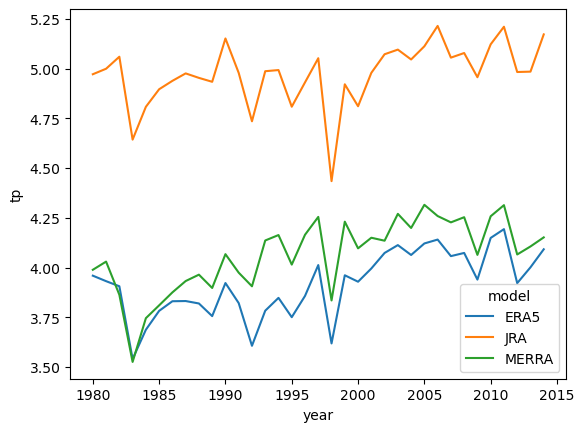

In [44]:
reanalysis_pr.tp.sel(latitude=slice(25, 0)).mean(['latitude']).groupby('time.year').mean('time').plot.line(x='year')

plt.show()

In [34]:
print(t_values1_reanalysis)
print(t_vals_reanalysis1)

<xarray.DataArray (model: 3)>
array([2.18105927, 1.16789851, 2.25942091])
Coordinates:
    degree   int64 1
  * model    (model) object 'ERA5' 'JRA' 'MERRA'
[2.05451047 2.04445852 2.06055082]


In [ ]:
slope * pr_adjust * gpcp_precip_trend.polyfit_coefficients.sel(degree=1).sel(lat=pr_slice).mean('lat') + int_val

In [ ]:
r_val ** 2

In [ ]:
2023	3,997.67	3,824.14	4,179.76	3,808.10	3,970.99	3.42%
2022	4,097.49	4,796.56	4,796.56	3,577.03	3,839.50	-19.44%
2021	4,273.41	3,700.65	4,793.06	3,700.65	4,766.18	26.89%
2020	3,217.86	3,257.85	3,756.07	2,237.40	3,756.07	16.26%
2019	2,913.36	2,510.03	3,240.02	2,447.89	3,230.78	28.88%
2018	2,746.21	2,695.81	2,930.75	2,351.10	2,506.85	-6.24%

In [70]:
annual_returns = [-6.24, 28.88, 16.26, 26.89, -19.44]

current_amount = 2695

for i in range(len(annual_returns)):
    current_amount = current_amount * (1 + annual_returns[i]/100)
    print(current_amount)
    

2526.832
3256.5810816
3786.10116546816
4804.183768862548
3870.250444195669


In [115]:
#Closes at end of each month from March 2020 to Jan 2023


actual = np.array([769998, 858581, 893333, 896034, 967344, 1024287, 1005509, 985644, 1087678, 1132999, 1130469, 1147785,
          1184024, 1236826, 1206411, 1230928, 1252929, 1249360, 1207290, 1272073, 1281762, 1321860, 1218424,
          1207225, 1248141, 1130070, 1129532, 1048543, 1133768, 1093780, 986971, 1046977, 1074728, 1041215,
          1098236])

In [116]:
s_and_p_500 = np.array([2585, 2912, 3044, 3100, 3271, 3500, 3363, 3269, 3621, 3756, 3714, 3811, 3972, 4181, 4204, 4297,
               4395, 4522, 4307, 4605, 4567, 4766, 4515, 4373, 4530, 4131, 4132, 3785, 4130, 3955, 3585, 3871, 4080,
               3839, 4076])#, 3970])



In [117]:

vangaurd = np.array([239, 269, 282, 286, 302, 325, 310, 302, 335, 346, 343, 352, 366, 386, 389, 397, 406, 418, 397, 425, 422,
                     440, 417, 405, 418, 382, 382, 349, 381, 366, 331, 358, 378, 354, 376])#, 367])



In [118]:


dow = np.array([21917, 24345, 25383, 25812, 26428, 28430, 27781, 26501, 29638, 30606, 29982, 30932, 32981, 33874, 
                34529, 34502, 34935, 35360, 33843, 35819, 34483, 36338, 35131, 33892, 34678, 32977, 32990,
                30775, 32845, 31510, 28725, 32732, 34589, 33147, 34086])


In [119]:
print((s_and_p_500[-1] - s_and_p_500[0]) / s_and_p_500[0])
print((actual[-1] - actual[0]) / actual[0])
print((vangaurd[-1] - vangaurd[0]) / vangaurd[0])
print((dow[-1] - dow[0]) / dow[0])

0.57678916827853
0.4262842241148678
0.5732217573221757
0.555231099146781


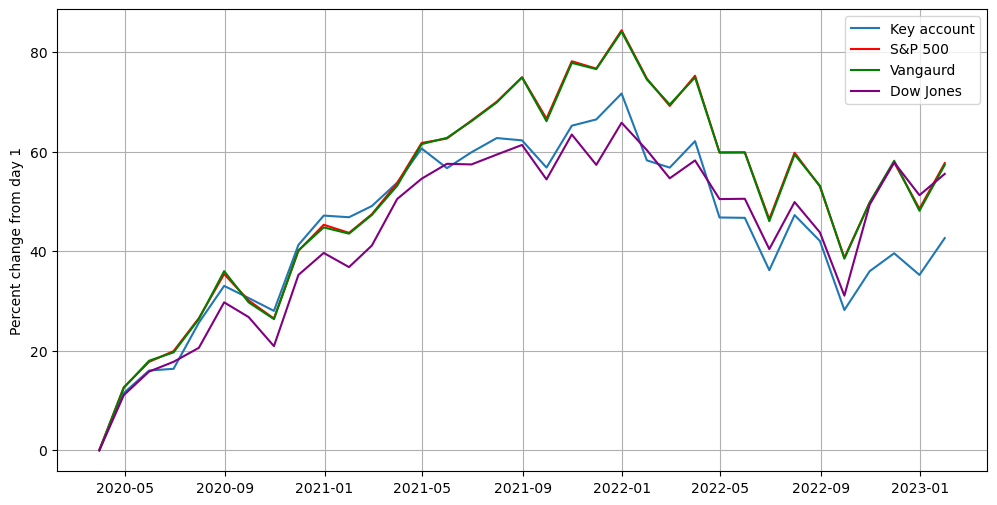

In [135]:
import pandas as pd
date_range = pd.date_range("2020-03-01","2023-02-01",freq='1M')

plt.figure(figsize=(12,6))
plt.plot(date_range, 100 * (actual - actual[0]) / actual[0], label='Key account')

#ax2 = plt.twinx()


plt.plot(date_range, 100 * (s_and_p_500 - s_and_p_500[0]) / s_and_p_500[0], color='r', label='S&P 500')

plt.plot(date_range, 100 * (vangaurd - vangaurd[0]) / vangaurd[0], color='g', label='Vangaurd')

plt.plot(date_range, 100 * (dow - dow[0]) / dow[0], color='purple', label='Dow Jones')
plt.grid()

plt.legend(loc=0)
plt.ylabel('Percent change from day 1')

plt.show()